<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team44/blob/main/Reduccion_dimensiones_A01793252.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tecnológico de Monterrey**

##Maestría en Inteligencia Artificial Aplicada

>Curso: Ciencia y Analítica de Datos

>Entregable : Actividad Semanal - 5 Repaso Transformación y reducción de dimensiones

>Alumno:

* AQUILES YONATAN ARMENTA HERNANDEZ - A01793252

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [3]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción
#values, vectors = np.linalg.eig(A)

W = vectors
Winv = inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= (W.dot(D)).dot(Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [4]:
#EJEMPLO DE COMPOSICION Y DESCOMPOSICION DE LA MATRIZ A1


#MATRIZ 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])

# IMPRESION DE LA MATRIZ ORIGINAL A1

print("-------MATRIZ ORIGINAL A1-------")
print(A1)
print("-----------------------------")

# CALCULO DE LA EIG DESCOMPOSICION
valuesA1, vectorsA1 = eig(A1)

# IMPRESION DE LOS VALORES CALCULADOS
print(valuesA1) #D
print(vectorsA1) #W

# RECONSTRUIMOS PARA VERIFICAR QUE LA DESCOMPOSICION ES IGUAL A LA COMPOSICION

WA1 = vectorsA1
WinvA1 = inv(WA1)
DA1 = np.diag(valuesA1)

# IMPRESION DE LA MATRIZ DESPUES DE LA COMPOSICION
B1= (WA1.dot(DA1)).dot(WinvA1)
print("-------MATRIZ RECONSTRUIDA A1-------")
print(B1)
print("-----------------------------")




-------MATRIZ ORIGINAL A1-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------MATRIZ RECONSTRUIDA A1-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------


In [5]:
#EJEMPLO DE COMPOSICION Y DESCOMPOSICION DE LA MATRIZ A2

#MATRIZ 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])

# IMPRESION DE LA MATRIZ ORIGINAL A2

print("-------MATRIZ ORIGINAL A2-------")
print(A2)
print("-----------------------------")

# CALCULO DE LA EIG DESCOMPOSICION
valuesA2, vectorsA2 = eig(A2)

# IMPRESION DE LOS VALORES CALCULADOS
print(valuesA2) #D
print(vectorsA2) #W

# RECONSTRUIMOS PARA VERIFICAR QUE LA DESCOMPOSICION ES IGUAL A LA COMPOSICION

WA2 = vectorsA2
WinvA2 = inv(WA2)
DA2 = np.diag(valuesA2)

# IMPRESION DE LA MATRIZ DESPUES DE LA COMPOSICION
B2= (WA2.dot(DA2)).dot(WinvA2)
print("-------MATRIZ RECONSTRUIDA A2-------")
print(B2)
print("-----------------------------")

-------MATRIZ ORIGINAL A2-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------MATRIZ RECONSTRUIDA A2-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


In [6]:
#EJEMPLO DE COMPOSICION Y DESCOMPOSICION DE LA MATRIZ A3

#MATRIZ 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])

# IMPRESION DE LA MATRIZ ORIGINAL A2

print("-------MATRIZ ORIGINAL A3-------")
print(A3)
print("-----------------------------")

# CALCULO DE LA EIG DESCOMPOSICION
valuesA3, vectorsA3 = eig(A3)

# IMPRESION DE LOS VALORES CALCULADOS
print(valuesA3) #D
print(vectorsA3) #W

# RECONSTRUIMOS PARA VERIFICAR QUE LA DESCOMPOSICION ES IGUAL A LA COMPOSICION

WA3 = vectorsA3
WinvA3 = inv(WA3)
DA3 = np.diag(valuesA3)

# IMPRESION DE LA MATRIZ DESPUES DE LA COMPOSICION
B3= (WA3.dot(DA3)).dot(WinvA3)
print("-------MATRIZ RECONSTRUIDA A3-------")
print(B3)
print("-----------------------------")

-------MATRIZ ORIGINAL A3-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------MATRIZ RECONSTRUIDA A3-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


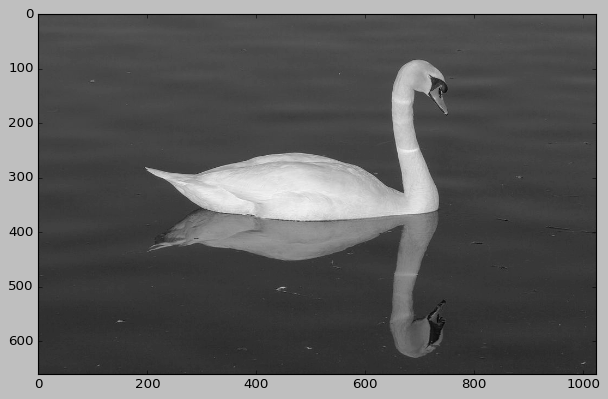

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F436F9697D0>


In [15]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [16]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [17]:
U.shape

(660, 660)

In [18]:
V.shape

(1024, 1024)

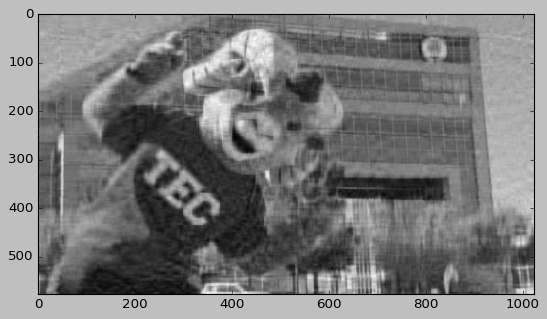

Felicidades la imagen está comprimida


In [41]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 30
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[154. 154. 154. ... 194. 194. 194.]


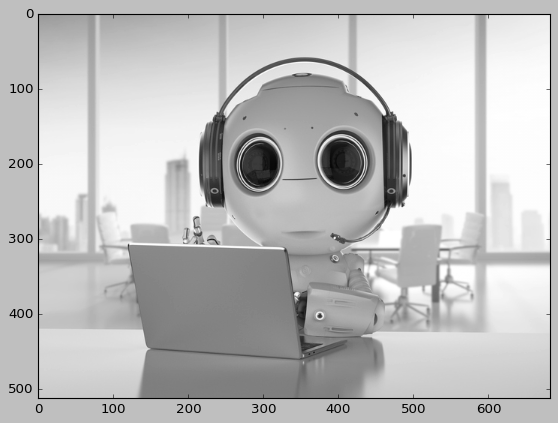

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=683x512 at 0x7F4369E8E050>
(512, 683)
(512, 512)
(683, 683)


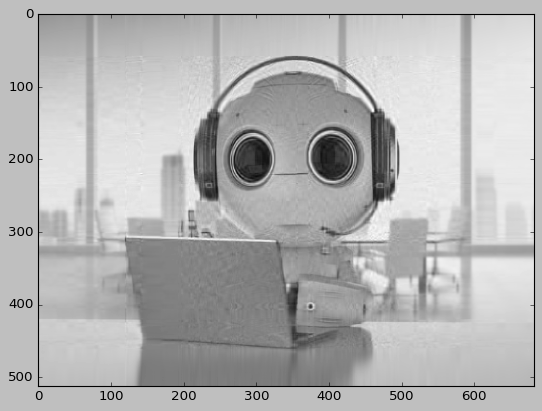

Imagen Comprimida


In [42]:
#CONVERTIR IMAGEN 1

nameFile = 'https://d39bmof8blmz8u.cloudfront.net/wp-content/uploads/2019/04/robots-dia-trabajo.jpg' # URL IMAGEN


img1 = Image.open(urllib.request.urlopen(nameFile)) # ABRIMOS LA IMAGEN
imggray1 = img1.convert('LA') # CONVERTIMOS A ESCALA DE GRISES
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)  # OBTENEMOS LAS DATOS DE LA IMAGEN
print(imgmat1) #IMPRIMIMOS EL ARRAY CORRESPONDIENTE A LA IMAGEN

imgmat1.shape = (imggray1.size[1],imggray1.size[0])
plt.style.use('classic')
plt.figure(figsize=(9,6)) # TAMAÑO DE LA IMAGEN
plt.imshow(imgmat1,cmap='gray') # COLOR DE LA IMAGEN
plt.show() # VISUALIZAMOS LA IMAGEN
print(img1) # IMPRIMIMOS LAS CARACTERISTICAS DE LA IMAGEN

U,D,V = np.linalg.svd(imgmat1)  # SINGULAR VALUE DECOMPOSITION
print(imgmat1.shape)  # OBTENEMOS EL TAMAÑO DE LA IMAGEN 
print(U.shape) 
print(V.shape)

nvalue = 50 # DEFINIMOS UN NUEVO TAMAÑO PARA LA IMAGEN
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:]) # SE RECONSTRUYE LA IMAGEN CON LOS NUEVOS TAMAÑOS
plt.imshow(reconstimg,cmap='gray')# COLOR DE LA IMAGEN
plt.show()# VISUALIZAMOS LA IMAGEN
print("Imagen Comprimida")



[255. 255. 255. ... 255. 255. 255.]


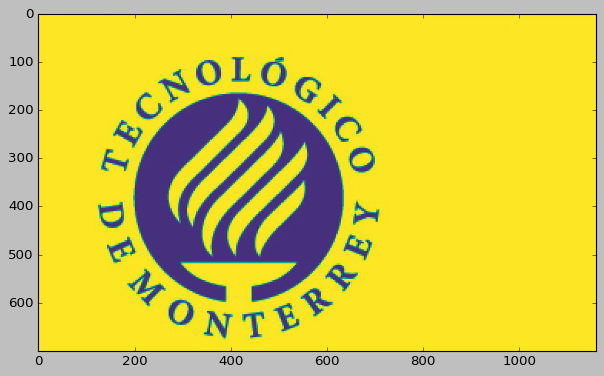

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1160x700 at 0x7F436999B3D0>
(700, 1160)
(700, 700)
(1160, 1160)


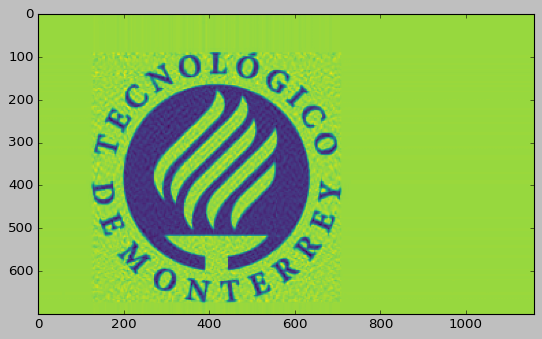

Imagen Comprimida


In [43]:
#CONVERTIR IMAGEN 2

nameFile = 'https://www.quadratin.com.mx/www/wp-content/uploads/2017/12/tec-monterrey-1160x700.jpg' # URL IMAGEN


img1 = Image.open(urllib.request.urlopen(nameFile)) # ABRIMOS LA IMAGEN
imggray1 = img1.convert('LA') # CONVERTIMOS A ESCALA DE GRISES
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)  # OBTENEMOS LAS DATOS DE LA IMAGEN
print(imgmat1) #IMPRIMIMOS EL ARRAY CORRESPONDIENTE A LA IMAGEN

imgmat1.shape = (imggray1.size[1],imggray1.size[0])
plt.style.use('classic')
plt.figure(figsize=(9,6)) # TAMAÑO DE LA IMAGEN
plt.imshow(imgmat1,cmap='viridis') # COLOR DE LA IMAGEN
plt.show() # VISUALIZAMOS LA IMAGEN
print(img1) # IMPRIMIMOS LAS CARACTERISTICAS DE LA IMAGEN

U,D,V = np.linalg.svd(imgmat1)  # SINGULAR VALUE DECOMPOSITION
print(imgmat1.shape)  # OBTENEMOS EL TAMAÑO DE LA IMAGEN 
print(U.shape) 
print(V.shape)

nvalue = 50 # DEFINIMOS UN NUEVO TAMAÑO PARA LA IMAGEN
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:]) # SE RECONSTRUYE LA IMAGEN CON LOS NUEVOS TAMAÑOS
plt.imshow(reconstimg,cmap='viridis')# COLOR DE LA IMAGEN
plt.show()# VISUALIZAMOS LA IMAGEN
print("Imagen Comprimida")



[169. 169. 169. ... 235. 236. 236.]


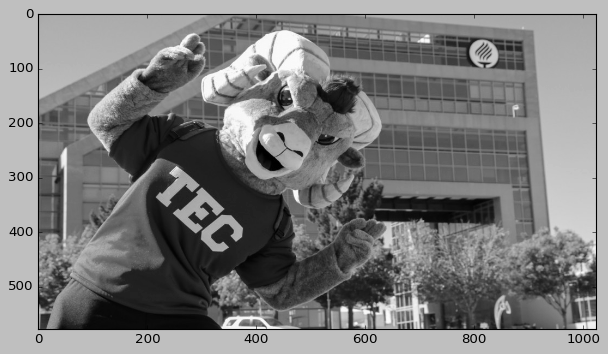

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x577 at 0x7F4369AAEE90>
(577, 1024)
(577, 577)
(1024, 1024)


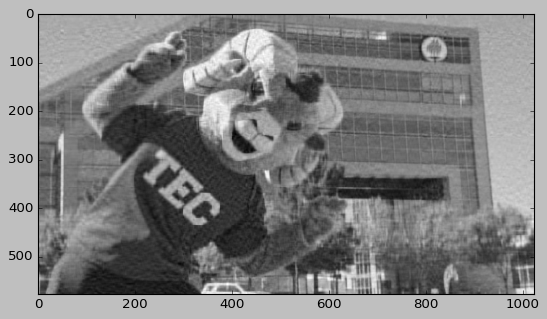

Imagen Comprimida


In [44]:
#CONVERTIR IMAGEN 3

nameFile = 'https://miningmexico.com/wp-content/uploads/2022/09/tec.jpeg' # URL IMAGEN


img1 = Image.open(urllib.request.urlopen(nameFile)) # ABRIMOS LA IMAGEN
imggray1 = img1.convert('LA') # CONVERTIMOS A ESCALA DE GRISES
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)  # OBTENEMOS LAS DATOS DE LA IMAGEN
print(imgmat1) #IMPRIMIMOS EL ARRAY CORRESPONDIENTE A LA IMAGEN

imgmat1.shape = (imggray1.size[1],imggray1.size[0])
plt.style.use('classic')
plt.figure(figsize=(9,6)) # TAMAÑO DE LA IMAGEN
plt.imshow(imgmat1,cmap='gray') # COLOR DE LA IMAGEN
plt.show() # VISUALIZAMOS LA IMAGEN
print(img1) # IMPRIMIMOS LAS CARACTERISTICAS DE LA IMAGEN

U,D,V = np.linalg.svd(imgmat1)  # SINGULAR VALUE DECOMPOSITION
print(imgmat1.shape)  # OBTENEMOS EL TAMAÑO DE LA IMAGEN 
print(U.shape) 
print(V.shape)

nvalue = 50 # DEFINIMOS UN NUEVO TAMAÑO PARA LA IMAGEN
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:]) # SE RECONSTRUYE LA IMAGEN CON LOS NUEVOS TAMAÑOS
plt.imshow(reconstimg,cmap='gray')# COLOR DE LA IMAGEN
plt.show()# VISUALIZAMOS LA IMAGEN
print("Imagen Comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

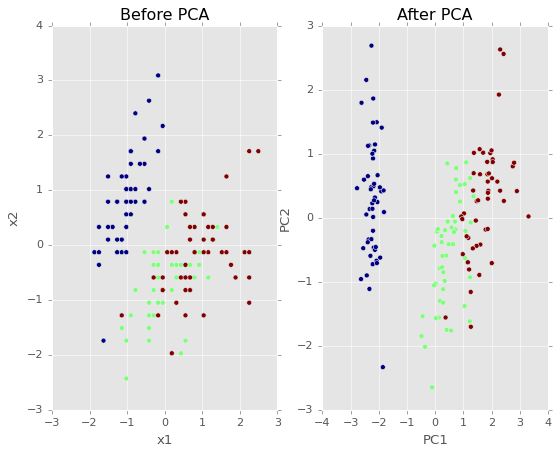

In [47]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [48]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [49]:
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [50]:
pca.explained_variance_
array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

In [52]:
print(abs( pca.components_ ))


[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [53]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

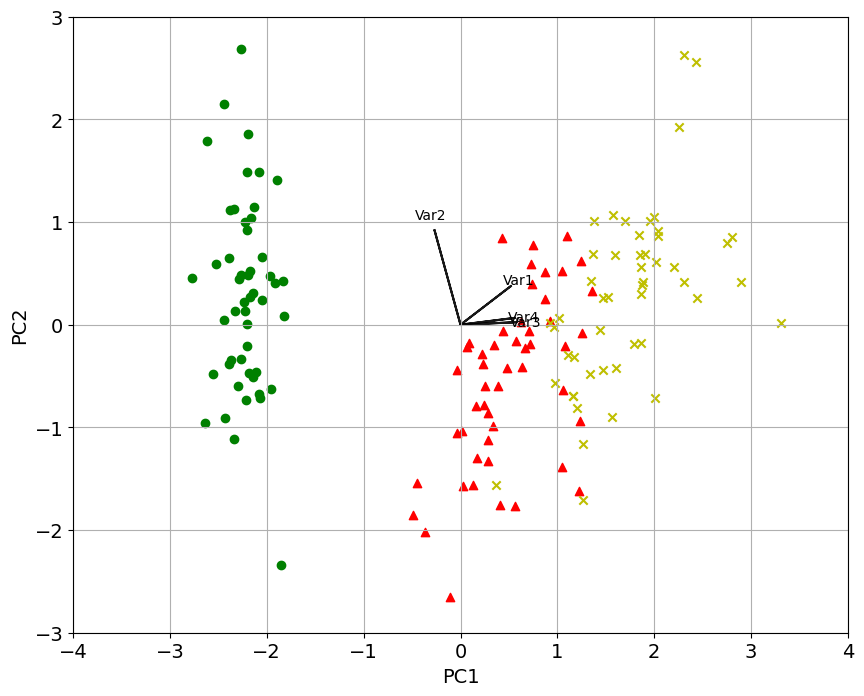

In [54]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [55]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

## Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Podemos concluir que PDA es una técnica de reducción de dimensionalidad no supervisada que construye características/variables relevantes a través de combinaciones lineales (PCA lineal) o no lineales (PCA kernel) de las variables originales, aunque en la practica solo se enfocaron en la parte lineal podemos concluir lo siguiente:

* La técnica PCA es particularmente útil en el procesamiento de datos donde existe multicolinealidad entre las características / variables .
* PCA se puede utilizar cuando las dimensiones de las características de entrada son altas (por ejemplo, muchas variables).
* PCA también se puede utilizar para la eliminación de ruido y la compresión de datos .



